In [2]:
import pandas as pd #DataFrame
import numpy as np

from sklearn.datasets import load_iris #sklearn 내 toy data set 준비
from sklearn.datasets import load_digits
from sklearn.datasets import load_wine
from sklearn.datasets import load_breast_cancer

import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline
from sklearn.tree import export_graphviz

from sklearn.model_selection import train_test_split #Data Set을 train,test set으로 나누기 위한 메서드 
from sklearn.preprocessing import StandardScaler # 스케일링 메서드
from imblearn.over_sampling import ADASYN #Adaptive Synthetic Sampling

from sklearn.tree import DecisionTreeClassifier #결정트리
from sklearn.ensemble import RandomForestClassifier #랜덤포레스트 (sklearn.tree가 아니고 ensemble 내에 있음!)
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier, LogisticRegression

from sklearn.metrics import accuracy_score #평가지표(정확도)
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report #평가지표
from sklearn.metrics import confusion_matrix #array로 [[TP,FN][FP,TN]]

In [3]:
import sklearn
print(sklearn.__version__)

1.0


# 1. 손글씨 분류

In [4]:
digits = load_digits()
print(dir(digits))

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']


In [5]:
digits_data = pd.DataFrame(digits.data)
digits_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1797 non-null   float64
 1   1       1797 non-null   float64
 2   2       1797 non-null   float64
 3   3       1797 non-null   float64
 4   4       1797 non-null   float64
 5   5       1797 non-null   float64
 6   6       1797 non-null   float64
 7   7       1797 non-null   float64
 8   8       1797 non-null   float64
 9   9       1797 non-null   float64
 10  10      1797 non-null   float64
 11  11      1797 non-null   float64
 12  12      1797 non-null   float64
 13  13      1797 non-null   float64
 14  14      1797 non-null   float64
 15  15      1797 non-null   float64
 16  16      1797 non-null   float64
 17  17      1797 non-null   float64
 18  18      1797 non-null   float64
 19  19      1797 non-null   float64
 20  20      1797 non-null   float64
 21  21      1797 non-null   float64
 22  

In [6]:
digits.target_names # 0~9까지의 10가지 종류 라벨

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
digits.feature_names #픽셀의 좌측 상단부터 순서대로 나타내는것 (0~7) (0~7) 이므로 8x8 이미지

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

In [8]:
digits.data[0].shape #len(array) == 64 이므로 8x8 재확인. 이미지로 나타내려면 reshape(8,8)을 통해 재구성해야함.

(64,)

In [9]:
#https://velog.io/@tmddn0311/mnist-classification 해당 블로그에 따르면 정수처리보다 0~1 실수값 처리가 효율이 좋다고 말함.
#컬러는 각 val마다 값이 다름 이것을 모두 1로 치환하고 0,1로만 이루어진 데이터로 변환할때 성능은 증가할까? 오히려 감소했다.
#가까이있는 픽셀의 데이터값에도 영향을 받는 것으로 보임. 그렇다면 블로그와 동일하게 255가 아닌 최대값인 16으로 나눈다면?
digit_data = pd.DataFrame(data=digits.data,columns=digits.feature_names) # 기존 데이터
digit_prac = pd.DataFrame(data=digits.data,columns=digits.feature_names).copy(deep=True) # 16으로 나눌 데이터

digit_prac

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [10]:
digit_prac.describe() #정수로 이루어진 데이터 값(색상에 따라서 정해진 int가 있음.)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [11]:
#0~1사이의 실수값으로 픽셀값들 변경 ---- 일종의 스케일링 작업
for i in digit_prac.columns:
    digit_prac.loc[(digit_prac[i] != 0),i]= digit_prac[i]/16

In [12]:
digit_data.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [13]:
digit_prac.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.00000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.01899,0.325299,0.739740,0.740505,0.361366,0.085142,0.008104,0.000348,0.124617,...,0.232819,0.012903,0.000035,0.017460,0.347350,0.755565,0.738070,0.422753,0.129243,0.022781
std,0.0,0.05670,0.297177,0.265553,0.267962,0.354151,0.207861,0.064836,0.005889,0.199760,...,0.307463,0.061525,0.001474,0.058394,0.318939,0.273418,0.308372,0.368789,0.255659,0.116258
min,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.00000,0.062500,0.625000,0.625000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.062500,0.687500,0.625000,0.000000,0.000000,0.000000
50%,0.0,0.00000,0.250000,0.812500,0.812500,0.250000,0.000000,0.000000,0.000000,0.000000,...,0.062500,0.000000,0.000000,0.000000,0.250000,0.812500,0.875000,0.375000,0.000000,0.000000
75%,0.0,0.00000,0.562500,0.937500,0.937500,0.687500,0.000000,0.000000,0.000000,0.187500,...,0.437500,0.000000,0.000000,0.000000,0.625000,1.000000,1.000000,0.750000,0.125000,0.000000
max,0.0,0.50000,1.000000,1.000000,1.000000,1.000000,1.000000,0.937500,0.125000,1.000000,...,1.000000,0.812500,0.062500,0.562500,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
# digit

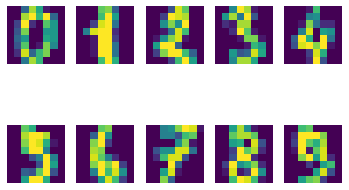

In [15]:
digit_data = digit_data.values
for i in range(10): #label 값을 통해 10가지 경우라는 것을 확인.
    plt.subplot(2,5,i+1) # 높이2 가로5의 공간(도화지)에 순서대로 이미지 넣기
    plt.imshow(digit_data[i].reshape(8,8))
    plt.axis('off')
plt.show()

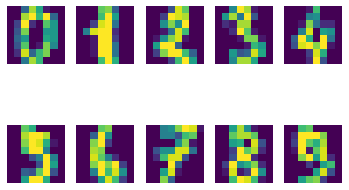

In [16]:
digit_prac = digit_prac.values
for i in range(10): #label 값을 통해 10가지 경우라는 것을 확인.
    plt.subplot(2,5,i+1) # 높이2 가로5의 공간(도화지)에 순서대로 이미지 넣기
    plt.imshow(digit_prac[i].reshape(8,8))
    plt.axis('off')
plt.show()

In [17]:
digits_label = pd.DataFrame(digits.target)
digits_label.value_counts() #label값들 간에 size 균형은 크게 차이나지 않음.

3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
dtype: int64

In [18]:
#model 함수를 이용한 머신러닝 자동화
#stratify label 분배 균일화
def model(data,label,model):
    X_train,X_test,y_train,y_test = train_test_split(data,label,test_size=0.2,stratify=label,random_state = 7)
    model = model
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    #https://jerimo.github.io/python/confusion-matrix/ 참고링크
    mat = confusion_matrix(y_test,y_pred)
    sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False)
    plt.xlabel('Tree label')
    plt.ylabel('predicted label')
    plt.show()

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        36
           1       0.84      0.86      0.85        37
           2       0.86      0.91      0.89        35
           3       0.83      0.81      0.82        37
           4       0.75      0.83      0.79        36
           5       0.94      0.81      0.87        36
           6       1.00      0.89      0.94        36
           7       0.87      0.92      0.89        36
           8       0.81      0.74      0.78        35
           9       0.78      0.86      0.82        36

    accuracy                           0.86       360
   macro avg       0.86      0.86      0.86       360
weighted avg       0.86      0.86      0.86       360



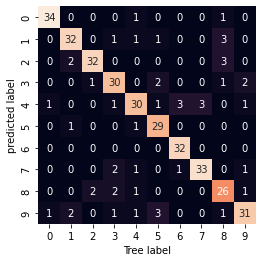

In [19]:
decision_tree = DecisionTreeClassifier()
model(digit_data,digits.target,decision_tree) #test set acc 86%
#heatmap의 숫자는 예측한 label에 카운팅되어있다. ex. 3으로 예측했지만 실제로는 1이었던 것이 2개

              precision    recall  f1-score   support

           0       0.97      0.92      0.94        36
           1       0.89      0.86      0.88        37
           2       0.91      0.91      0.91        35
           3       0.85      0.76      0.80        37
           4       0.78      0.86      0.82        36
           5       0.97      0.83      0.90        36
           6       0.97      0.89      0.93        36
           7       0.83      0.97      0.90        36
           8       0.78      0.71      0.75        35
           9       0.73      0.89      0.80        36

    accuracy                           0.86       360
   macro avg       0.87      0.86      0.86       360
weighted avg       0.87      0.86      0.86       360



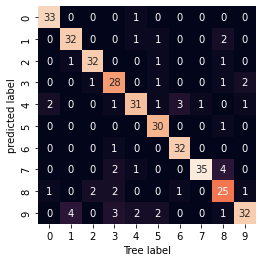

In [20]:
decision_tree = DecisionTreeClassifier()
model(digit_prac,digits.target,decision_tree) #test set acc 86%
#heatmap의 숫자는 예측한 label에 카운팅되어있다. ex. 3으로 예측했지만 실제로는 1이었던 것이 2개

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        36
           1       0.97      1.00      0.99        37
           2       0.97      1.00      0.99        35
           3       0.95      0.95      0.95        37
           4       0.95      1.00      0.97        36
           5       0.97      0.94      0.96        36
           6       0.97      1.00      0.99        36
           7       1.00      1.00      1.00        36
           8       0.97      0.91      0.94        35
           9       1.00      0.94      0.97        36

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



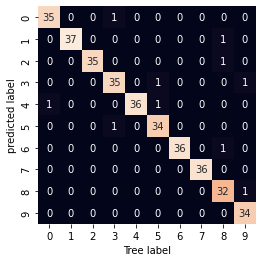

In [21]:
randomForest = RandomForestClassifier(n_estimators= 24)
model(digit_data,digits.target,randomForest) #decision tree에 비해 높은 96% (디시젼트리의 과적합 가능성..!) n_estimator =23

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.97      1.00      0.99        37
           2       0.95      1.00      0.97        35
           3       0.97      0.97      0.97        37
           4       0.97      1.00      0.99        36
           5       0.94      0.94      0.94        36
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        36
           8       0.97      0.89      0.93        35
           9       1.00      0.97      0.99        36

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



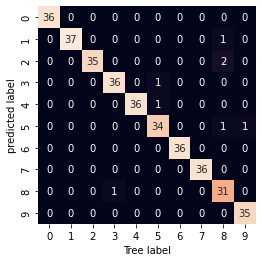

In [22]:
randomForest = RandomForestClassifier(n_estimators= 24)
model(digit_prac,digits.target,randomForest) #decision tree에 비해 높은 96% (디시젼트리의 과적합 가능성..!) n_estimator =23

In [23]:
df_importance = pd.DataFrame({'Feature':digits.feature_names,'Importance':randomForest.feature_importances_})
# 특정 픽셀이 key point로 작동하는 것은 아닌 것으로 보인다. 주위 픽셀값과 연계되서 인식하는 것인지?
df_importance.sort_values(by='Importance',ascending=False).T

,43,28,26,21,13,36,33,20,30,34,...,8,56,0,48,40,39,31,24,16,32
Feature,pixel_5_3,pixel_3_4,pixel_3_2,pixel_2_5,pixel_1_5,pixel_4_4,pixel_4_1,pixel_2_4,pixel_3_6,pixel_4_2,...,pixel_1_0,pixel_7_0,pixel_0_0,pixel_6_0,pixel_5_0,pixel_4_7,pixel_3_7,pixel_3_0,pixel_2_0,pixel_4_0
Importance,0.047718,0.042515,0.039707,0.036939,0.035142,0.033664,0.03342,0.032396,0.032161,0.031552,...,0.000173,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.97      1.00      0.99        37
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        37
           4       1.00      1.00      1.00        36
           5       0.97      0.97      0.97        36
           6       1.00      0.97      0.99        36
           7       1.00      1.00      1.00        36
           8       0.97      1.00      0.99        35
           9       0.97      0.94      0.96        36

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



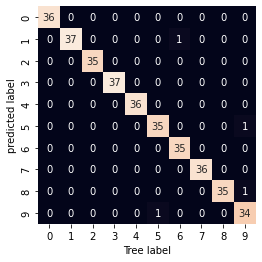

In [24]:
cvm = SVC()
model(digit_data,digits.target,cvm)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.97      1.00      0.99        37
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        37
           4       1.00      1.00      1.00        36
           5       0.97      0.97      0.97        36
           6       1.00      0.97      0.99        36
           7       1.00      1.00      1.00        36
           8       0.97      1.00      0.99        35
           9       0.97      0.94      0.96        36

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



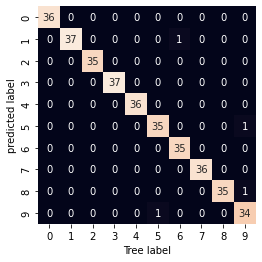

In [25]:
cvm = SVC()
model(digit_prac,digits.target,cvm)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        36
           1       0.95      1.00      0.97        37
           2       1.00      0.94      0.97        35
           3       0.97      0.92      0.94        37
           4       1.00      1.00      1.00        36
           5       0.92      0.92      0.92        36
           6       1.00      1.00      1.00        36
           7       0.97      1.00      0.99        36
           8       0.94      0.86      0.90        35
           9       0.92      1.00      0.96        36

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



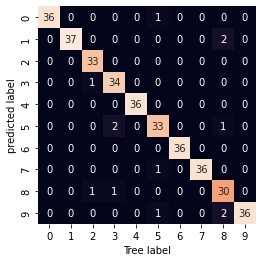

In [26]:
SGD = SGDClassifier()
model(digit_data,digits.target,SGD)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        36
           1       0.97      0.92      0.94        37
           2       1.00      0.94      0.97        35
           3       0.97      0.95      0.96        37
           4       1.00      1.00      1.00        36
           5       0.88      0.97      0.92        36
           6       0.95      1.00      0.97        36
           7       1.00      1.00      1.00        36
           8       0.94      0.91      0.93        35
           9       1.00      0.97      0.99        36

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



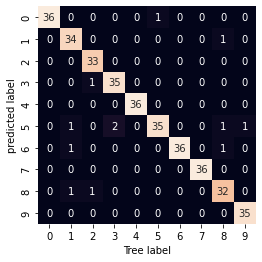

In [27]:
SGD = SGDClassifier()
model(digit_prac,digits.target,SGD)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.97      0.97      0.97        37
           2       0.97      0.97      0.97        35
           3       0.95      0.97      0.96        37
           4       1.00      1.00      1.00        36
           5       0.95      0.97      0.96        36
           6       1.00      0.97      0.99        36
           7       1.00      1.00      1.00        36
           8       0.97      0.97      0.97        35
           9       0.94      0.92      0.93        36

    accuracy                           0.97       360
   macro avg       0.98      0.97      0.98       360
weighted avg       0.98      0.97      0.97       360



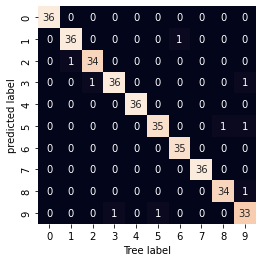

In [28]:
logistic = LogisticRegression(max_iter=3000) #convergenceWarning <<<< lbfgs failed to converge..?
model(digit_data,digits.target,logistic)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.97      0.97      0.97        37
           2       0.97      0.97      0.97        35
           3       0.95      0.97      0.96        37
           4       1.00      1.00      1.00        36
           5       0.95      0.97      0.96        36
           6       1.00      0.97      0.99        36
           7       1.00      1.00      1.00        36
           8       0.97      0.97      0.97        35
           9       0.94      0.92      0.93        36

    accuracy                           0.97       360
   macro avg       0.98      0.97      0.98       360
weighted avg       0.98      0.97      0.97       360



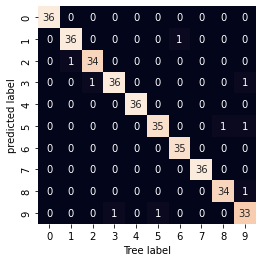

In [29]:
logistic = LogisticRegression(max_iter=3000) #convergenceWarning <<<< lbfgs failed to converge..?
model(digits.data,digits.target,logistic)

## 2. 와인 분류

### - 데이터 확인

In [30]:
wine = load_wine()

In [31]:
print(dir(wine))

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']


In [32]:
df_wine = pd.DataFrame(data=wine.data,columns=wine.feature_names)
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [33]:
df_wine[df_wine.duplicated()] #중복값 없음.

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline


In [34]:
df_wine.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### - 라벨별 컬럼 시각화
label 기준 각 컬럼별로 그래프의 위치가 잘 식별되는 컬럼을 기준으로 추가적인 어드벤티지를 적용하려함.
- alcohol,total_phenols,flavanoids : 도수의 차이가 확연하게 드러남. (*1.5)
- proline : label값이 1,2인 그래프가 근접해있지만 어느정도 식별은 가능하다고 예상 (*1.2)
- ash,alcalinity_of_ash,magnesium,nonflavanoid_phenols,hue,color_intensity,od280/od315_of_diluted_wines :   
거의 변별력이 없거나 2개의 라벨 그래프가 겹쳐서 오해가능성이 높은 경우

In [35]:
#시각화 작업을 위한 라벨분류
df_wine['label'] = pd.DataFrame(data=wine.target)
df_0 = df_wine[df_wine['label']==0]
df_1 = df_wine[df_wine['label']==1]
df_2 = df_wine[df_wine['label']==2]

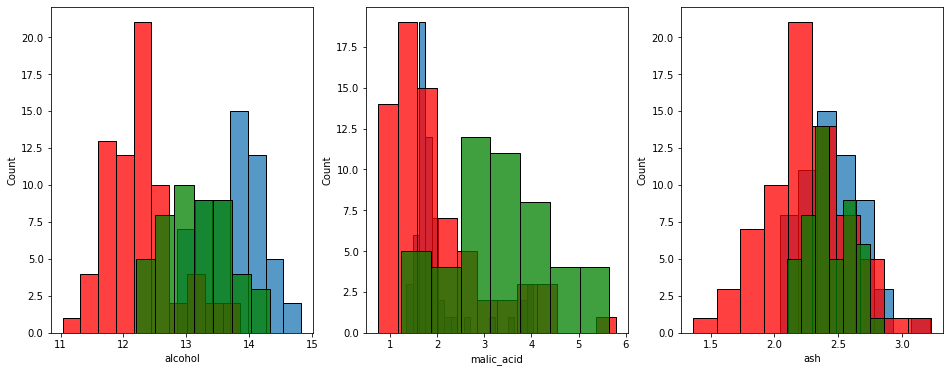

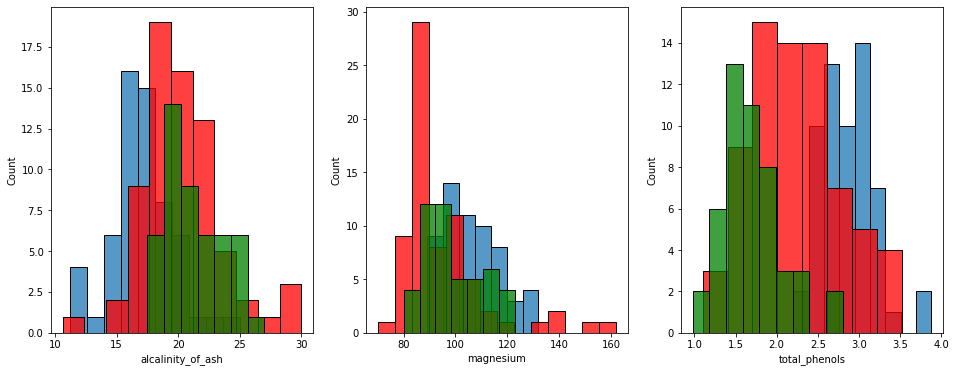

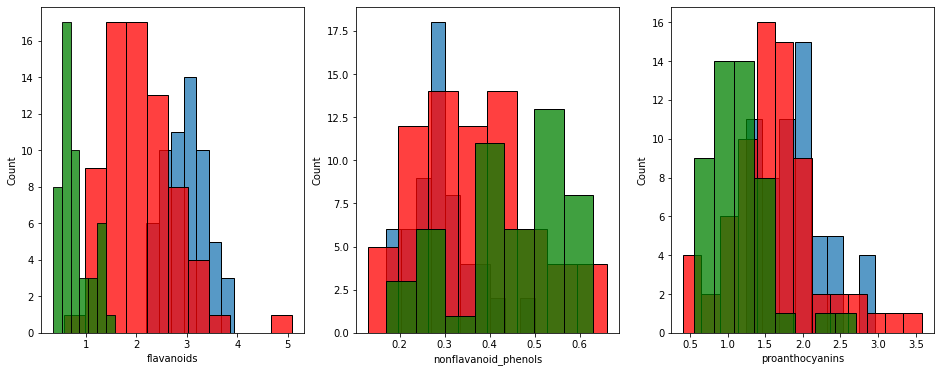

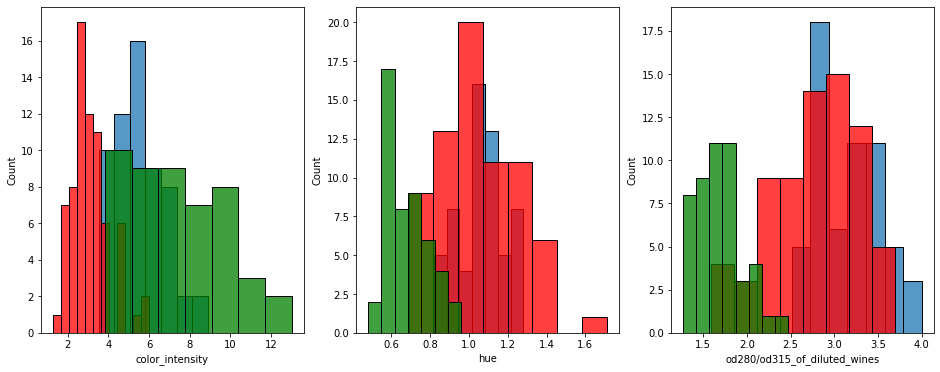

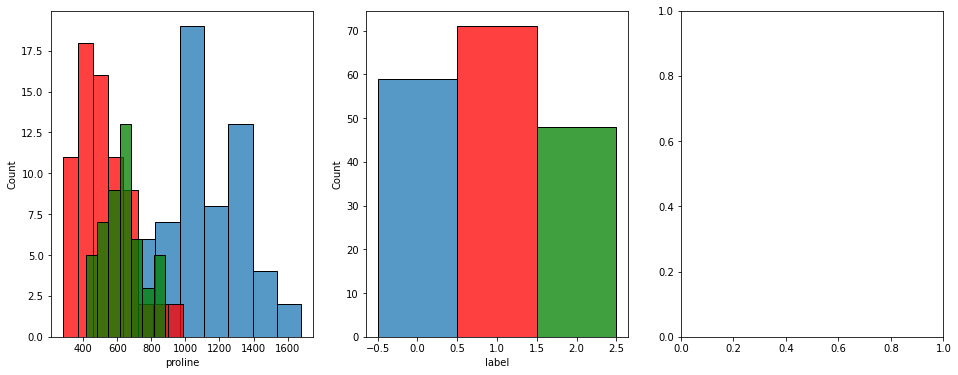

In [36]:
def graph(cnt):
    for i in range(cnt):
        try:
            f,axes = plt.subplots(1,3,figsize=(16,6))
            sns.histplot(data=df_0.iloc[:,0+(3*i)],ax=axes[0])
            sns.histplot(df_1.iloc[:,0+(3*i)],ax=axes[0],color='red')
            sns.histplot(df_2.iloc[:,0+(3*i)],ax=axes[0],color='green')

            sns.histplot(data=df_0.iloc[:,1+(3*i)],ax=axes[1])
            sns.histplot(df_1.iloc[:,1+(3*i)],ax=axes[1],color='red')
            sns.histplot(df_2.iloc[:,1+(3*i)],ax=axes[1],color='green')

            sns.histplot(data=df_0.iloc[:,2+(3*i)],ax=axes[2])
            sns.histplot(df_1.iloc[:,2+(3*i)],ax=axes[2],color='red')
            sns.histplot(df_2.iloc[:,2+(3*i)],ax=axes[2],color='green')
        except:
            print('')
    plt.show()
graph(5)

### - Feature Engineering

In [37]:
#컬럼별 가중치를 위해 이상치 처리, 스케일링 작업
def get_outlier(df=None, column=None, weight=1.5):

  quantile_25 = np.percentile(df[column].values, 25)
  quantile_75 = np.percentile(df[column].values, 75)

  IQR = quantile_75 - quantile_25
  IQR_weight = IQR*weight
  
  lowest = quantile_25 - IQR_weight
  highest = quantile_75 + IQR_weight
  
  outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
  return outlier_idx

# 함수 사용해서 이상치 값 삭제
for i in wine.feature_names:
    outlier_idx = get_outlier(df=df_wine, column=i, weight=1.5)
    df_wine.drop(outlier_idx, axis=0, inplace=True)

In [38]:
#데이터 스플릿
X_train,X_test,y_train,y_test = train_test_split(wine.data,wine.target,test_size=0.2,stratify=wine.target,random_state = 7)

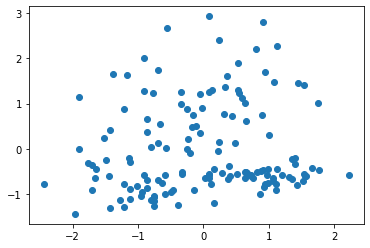

In [39]:
#https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=demian7607&logNo=222009975984 참고 블로그
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
plt.scatter(X_scaled[:,0],X_scaled[:,1]) # 정규화 확인

In [40]:
#가중치 추가해보기
X_scaled = pd.DataFrame(data = X_scaled,columns = wine.feature_names)
def w_plus(X_train,weight,weight_list):
    for i in weight_list:
        X_train[i] = X_train[i]*weight
    
w_plus(X_scaled,1.5,['alcohol','total_phenols','flavanoids'])
w_plus(X_scaled,1.2,['proline'])
X_scaled = np.array(X_scaled.values)

In [41]:
# X_scaled.describe()

### 모델 훈련 및 검증
- def model의 경우 원본데이터 
- def model_spl의 경우 EDA과정을 거친 데이터

In [42]:
#model 함수를 이용한 머신러닝 자동화
#stratify label 분배 균일화
def model_spl(X_train,X_test,y_train,y_test,model):
    model = model
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    #https://jerimo.github.io/python/confusion-matrix/ 참고링크
    mat = confusion_matrix(y_test,y_pred)
    sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False)
    plt.xlabel('Tree label')
    plt.ylabel('predicted label')
    plt.show()

              precision    recall  f1-score   support

           0       1.00      0.83      0.91        12
           1       0.87      0.93      0.90        14
           2       0.91      1.00      0.95        10

    accuracy                           0.92        36
   macro avg       0.93      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36



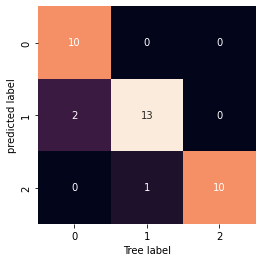

In [43]:
model(wine.data,wine.target,decision_tree)

              precision    recall  f1-score   support

           0       1.00      0.83      0.91        12
           1       0.88      1.00      0.93        14
           2       1.00      1.00      1.00        10

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.95        36
weighted avg       0.95      0.94      0.94        36



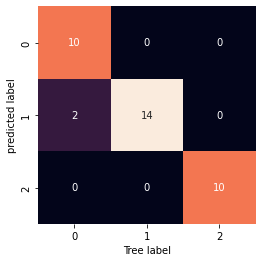

In [44]:
model_spl(X_scaled,X_test_scaled,y_train,y_test,decision_tree)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.93      0.96        14
           2       0.91      1.00      0.95        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



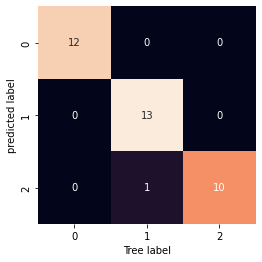

In [45]:
model(wine.data,wine.target,randomForest)

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.93      0.93      0.93        14
           2       0.91      1.00      0.95        10

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.95        36
weighted avg       0.95      0.94      0.94        36



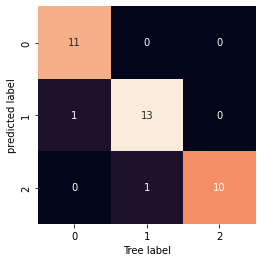

In [46]:
model_spl(X_scaled,X_test_scaled,y_train,y_test,randomForest)

              precision    recall  f1-score   support

           0       1.00      0.75      0.86        12
           1       0.60      0.86      0.71        14
           2       0.29      0.20      0.24        10

    accuracy                           0.64        36
   macro avg       0.63      0.60      0.60        36
weighted avg       0.65      0.64      0.63        36



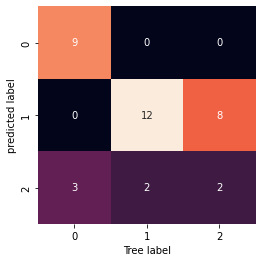

In [47]:
model(wine.data,wine.target,cvm)

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.88      1.00      0.93        14
           2       1.00      0.90      0.95        10

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.95        36
weighted avg       0.95      0.94      0.94        36



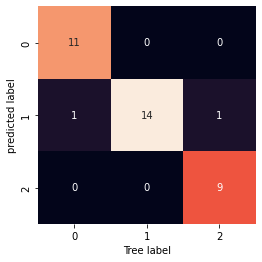

In [48]:
model_spl(X_scaled,X_test_scaled,y_train,y_test,cvm)

              precision    recall  f1-score   support

           0       0.67      0.67      0.67        12
           1       0.50      0.86      0.63        14
           2       0.00      0.00      0.00        10

    accuracy                           0.56        36
   macro avg       0.39      0.51      0.43        36
weighted avg       0.42      0.56      0.47        36



/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


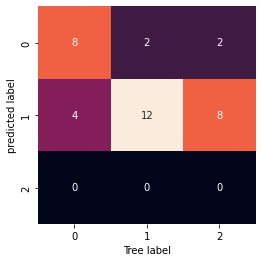

In [49]:
SGD = SGDClassifier()
model(wine.data,wine.target,SGD)

              precision    recall  f1-score   support

           0       1.00      0.83      0.91        12
           1       0.87      0.93      0.90        14
           2       0.91      1.00      0.95        10

    accuracy                           0.92        36
   macro avg       0.93      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36



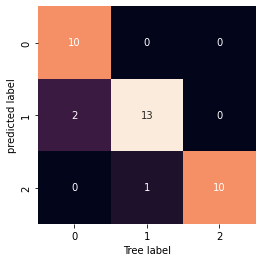

In [50]:
model_spl(X_scaled,X_test_scaled,y_train,y_test,SGD)

              precision    recall  f1-score   support

           0       1.00      0.83      0.91        12
           1       0.87      0.93      0.90        14
           2       0.91      1.00      0.95        10

    accuracy                           0.92        36
   macro avg       0.93      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36



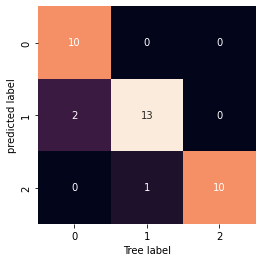

In [51]:
logistic = LogisticRegression(max_iter=3500)
model(wine.data,wine.target,logistic)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.93      0.96        14
           2       0.91      1.00      0.95        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



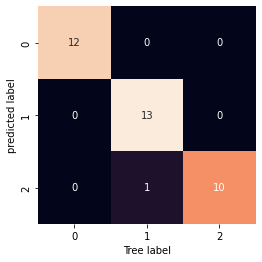

In [52]:
model_spl(X_scaled,X_test_scaled,y_train,y_test,logistic)

## 3.유방암 분류

In [53]:
cancer = load_breast_cancer()

In [54]:
print(dir(cancer))

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [55]:
cancer.target # 0,1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [56]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [57]:
cancer_data = pd.DataFrame(data=cancer.data,columns=cancer.feature_names)
cancer_data['label'] = pd.DataFrame(data=cancer.target)
cancer_data.info(),cancer_data[cancer_data.duplicated()]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

(None,
 Empty DataFrame
 Columns: [mean radius, mean texture, mean perimeter, mean area, mean smoothness, mean compactness, mean concavity, mean concave points, mean symmetry, mean fractal dimension, radius error, texture error, perimeter error, area error, smoothness error, compactness error, concavity error, concave points error, symmetry error, fractal dimension error, worst radius, worst texture, worst perimeter, worst area, worst smoothness, worst compactness, worst concavity, worst concave points, worst symmetry, worst fractal dimension, label]
 Index: []
 
 [0 rows x 31 columns])

In [58]:
df_0 = cancer_data[cancer_data['label']==0]
df_1 = cancer_data[cancer_data['label']==1]

In [59]:
df_0

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,...,29.41,179.10,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873,0
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.1139,0.3094,0.3403,0.1418,0.2218,0.07820,0


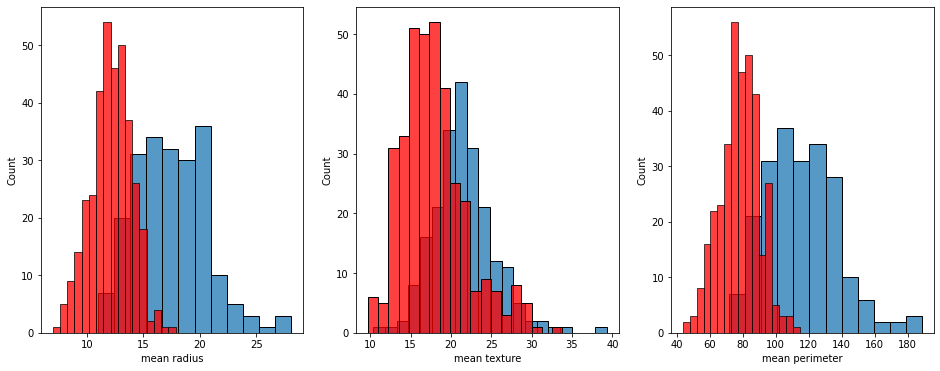

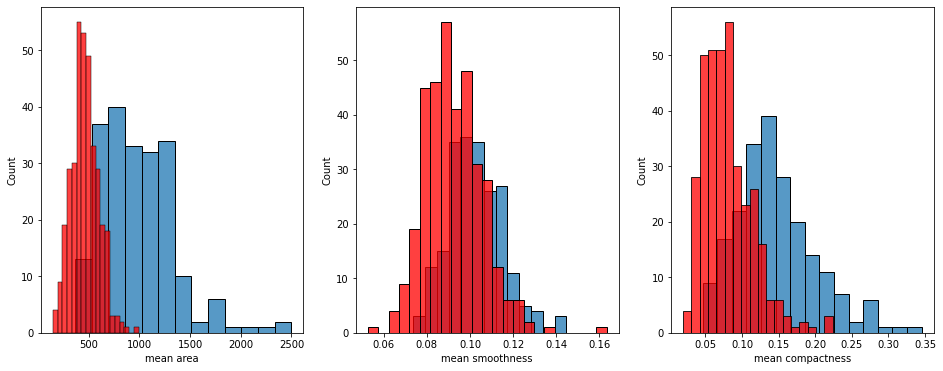

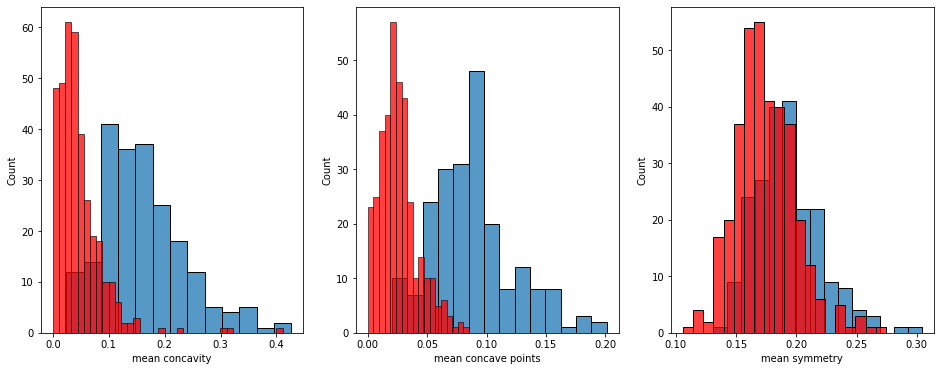

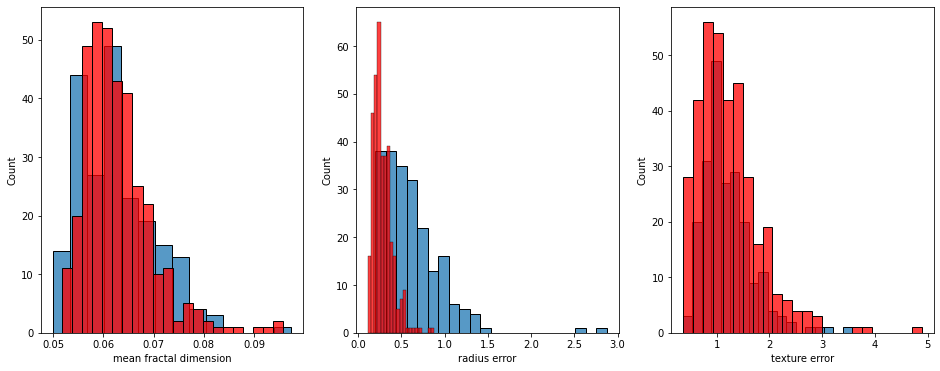

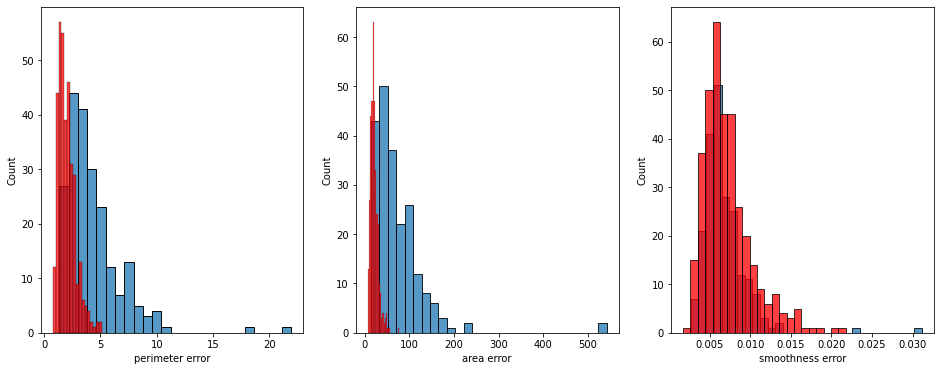

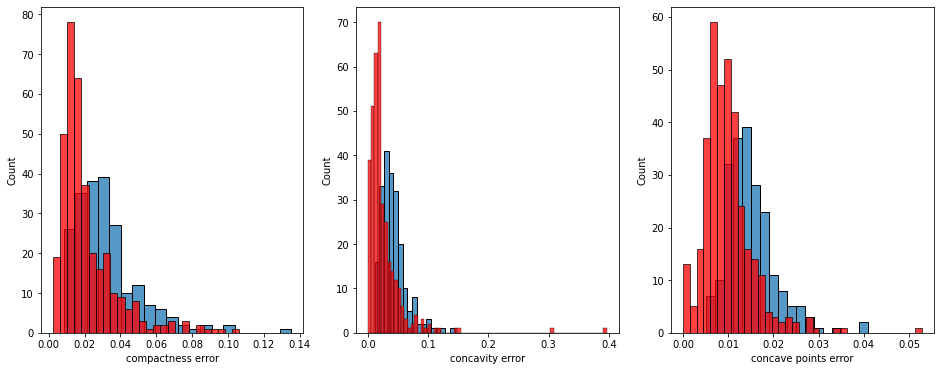

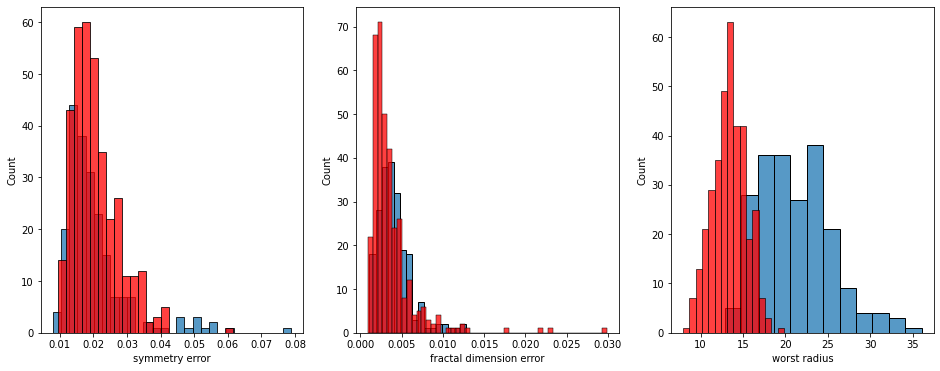

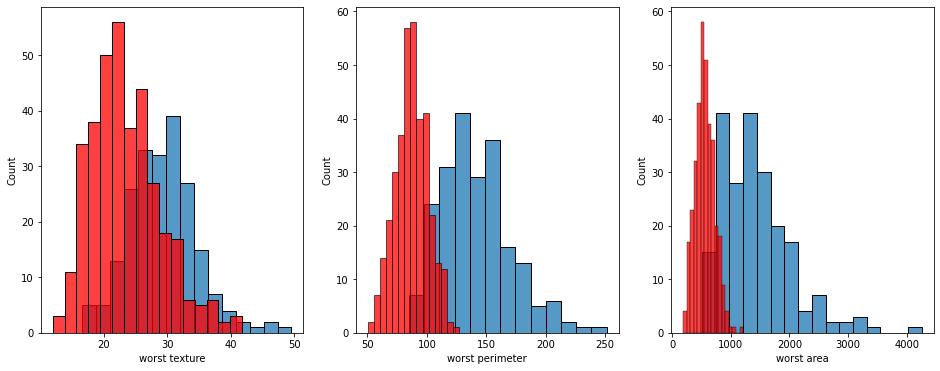

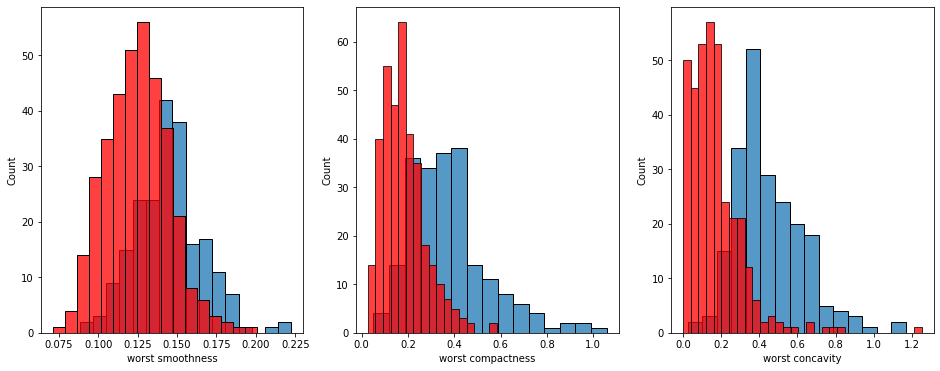

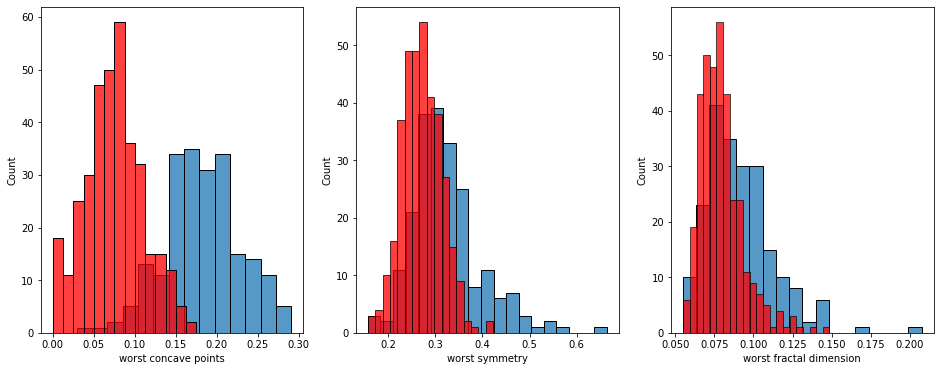

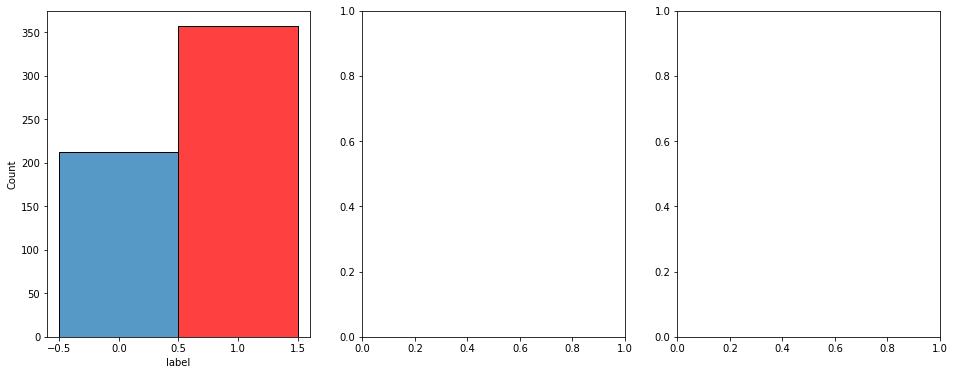

In [60]:
def graph(cnt):
    for i in range(cnt):
        try:
            f,axes = plt.subplots(1,3,figsize=(16,6))
            sns.histplot(data=df_0.iloc[:,0+(3*i)],ax=axes[0])
            sns.histplot(df_1.iloc[:,0+(3*i)],ax=axes[0],color='red')
            
            sns.histplot(data=df_0.iloc[:,1+(3*i)],ax=axes[1])
            sns.histplot(df_1.iloc[:,1+(3*i)],ax=axes[1],color='red')
            
            sns.histplot(data=df_0.iloc[:,2+(3*i)],ax=axes[2])
            sns.histplot(df_1.iloc[:,2+(3*i)],ax=axes[2],color='red')
        
        except:
            print('')
    plt.show()
graph(11)

#### 컬럼 분석
##### 중앙값,최빈값 등을 기준으로 구별이 확실한지 정도에 따라 분류하고 가중치 차별화
- mean radius,mean perimeter,mean compactness,mean concavity,mean concave points,worst radius,worst perimeter,worst area,worst concavity,worst concave points : 1.5

- mean texture,worst compactness : 1.2

- mean area,worst texture : 1.2

- mean smoothness, mean symmetry, mean fractal dimension,radius error,texture error,perimeter error,area error,smoothnesserror,compactness error,concavity error,concave points error,symmetry error,fractal dimension error, worst smoothness,worst symmetry,rost fractal dimension : 1


In [61]:
#컬럼별 가중치를 위해 이상치 처리, 스케일링 작업
def get_outlier(df=None, column=None, weight=1.5):

  quantile_25 = np.percentile(df[column].values, 25)
  quantile_75 = np.percentile(df[column].values, 75)

  IQR = quantile_75 - quantile_25
  IQR_weight = IQR*weight
  
  lowest = quantile_25 - IQR_weight
  highest = quantile_75 + IQR_weight
  
  outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
  return outlier_idx

# 함수 사용해서 이상치 값 삭제
for i in cancer.feature_names:
    outlier_idx = get_outlier(df=cancer_data, column=i, weight=1.5)
    cancer_data.drop(outlier_idx, axis=0, inplace=True)

In [62]:
#데이터 스플릿
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,test_size=0.2,stratify=cancer.target,random_state = 7)

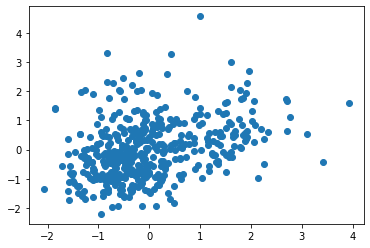

In [63]:
#https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=demian7607&logNo=222009975984 참고 블로그
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
plt.scatter(X_scaled[:,0],X_scaled[:,1]) # 정규화 확인

In [64]:
# #오버 샘플링 ADASYN
# adasyn = ADASYN(random_state=22)
# X_scaled,y_train = adasyn.fit_resample(X_scaled,y_train)

In [65]:
#가중치 추가해보기
X_scaled = pd.DataFrame(data = X_scaled,columns = cancer.feature_names)
def w_plus(X_train,weight,weight_list):
    for i in weight_list:
        X_train[i] = X_train[i]*weight
    
w_plus(X_scaled,1.5,['mean radius','mean perimeter','mean compactness',"mean concavity",'mean concave points','worst radius',"worst perimeter",'worst area','worst concavity','worst concave points'])
w_plus(X_scaled,1.2,['mean texture','worst compactness','mean area','worst texture'])
X_scaled = np.array(X_scaled.values)

In [66]:
#model 함수를 이용한 머신러닝 자동화
#stratify label 분배 균일화
def model_cancer(X_train,X_test,y_train,y_test,model):
    model = model
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    #https://jerimo.github.io/python/confusion-matrix/ 참고링크
    mat = confusion_matrix(y_test,y_pred)
    sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False)
    plt.xlabel('Tree label')
    plt.ylabel('predicted label')
    plt.show()

              precision    recall  f1-score   support

           0       0.87      0.95      0.91        42
           1       0.97      0.92      0.94        72

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



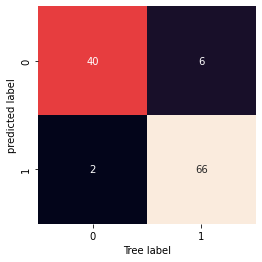

In [67]:
model(cancer.data,cancer.target,decision_tree)

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        42
           1       0.97      0.94      0.96        72

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



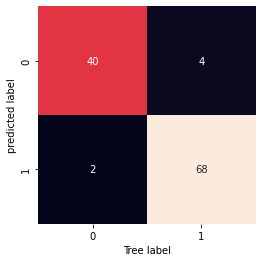

In [68]:
model_cancer(X_scaled,X_test_scaled,y_train,y_test,decision_tree)

              precision    recall  f1-score   support

           0       0.89      0.98      0.93        42
           1       0.99      0.93      0.96        72

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



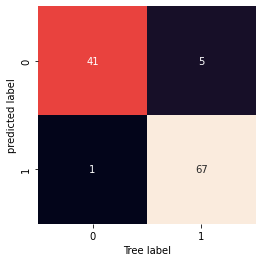

In [69]:
randomForest = RandomForestClassifier(n_estimators= 24)
model(cancer.data,cancer.target,randomForest)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



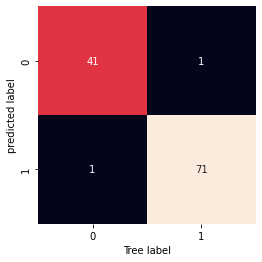

In [70]:
randomForest = RandomForestClassifier(n_estimators= 24)
model_cancer(X_scaled,X_test_scaled,y_train,y_test,randomForest)

              precision    recall  f1-score   support

           0       0.95      0.90      0.93        42
           1       0.95      0.97      0.96        72

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



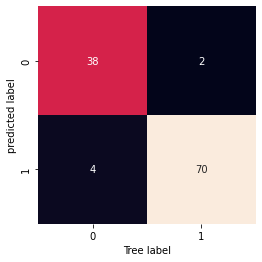

In [71]:
model(cancer.data,cancer.target,cvm)

              precision    recall  f1-score   support

           0       0.93      0.98      0.95        42
           1       0.99      0.96      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



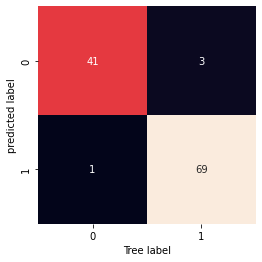

In [72]:
model_cancer(X_scaled,X_test_scaled,y_train,y_test,cvm)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        42
           1       0.96      0.96      0.96        72

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



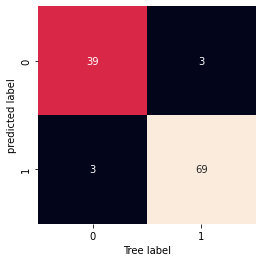

In [73]:
model(cancer.data,cancer.target,SGD)

              precision    recall  f1-score   support

           0       0.93      0.98      0.95        42
           1       0.99      0.96      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



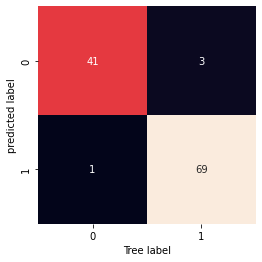

In [74]:
model_cancer(X_scaled,X_test_scaled,y_train,y_test,SGD)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94        42
           1       0.99      0.94      0.96        72

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



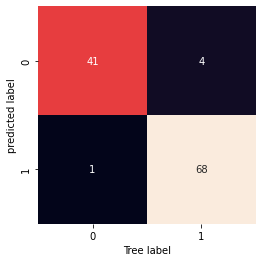

In [75]:
logistic = LogisticRegression(max_iter=3000)
model(cancer.data,cancer.target,logistic)

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        42
           1       0.99      0.97      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



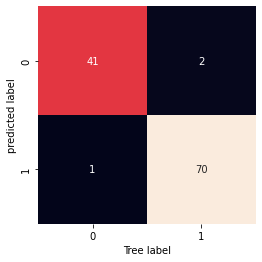

In [76]:
logistic = LogisticRegression(max_iter=2000)
model_cancer(X_scaled,X_test_scaled,y_train,y_test,logistic)

## 회고록
### 1. 손글씨 분류
- 새로 알게된 것들.
1. 베이스라인으로 사용할 데이터와 EDA를 적용한 데이터를 구성할때 deepcopy를 반드시 사용!
2. 픽셀값이 row형태로 있을때 for문,resahpe, plt만으로도 쉽게 이미지 구현이 가능함.

- 데이터 요약 : 각 columns은 픽셀값을 의미하며 8x8의 이미지를 나타낸다. label 값은 0~9로 이루어져있다. / 정밀도와 재현율 중 어느 것이 더중요하다고 생각하기 어려워 F1 score를 기준으로 판단해야함. (다른숫자들을 1로 오해? vs 1을 다른숫자로 오해?)


- 실습 진행 기록
1. 베이스라인 모델로도 충분한 정확도가 출력됨.
2. 동일한 데이터로 실험을 진행한 블로그들 탐방하면서 EDA과정 습득해보려함.  

    - 컴퓨터가 0과 0이외의 다른 수치를 어떻게 구분해서 이미지 인식을 진행하는지 알아보려함.  
 
 
        1. 0을 제외한 다른 정수형 데이터에 대해서 임의의 값으로 대체(컬러사진을 흑백사진으로 만들어보자 라는 개념) => 이미지 출력을 해봤을때 오히려 더 구분하기 어려워지는 것이 육안으로 확인되며 실제 모델성능도 오히려 떨어짐.  
        
        2. 참고한 블로그처럼 각 수치간의 거리를 줄이면 조금더 성능이 높아질지? (해당 블로그에서는 255기준이었지만 우리가 사용하는 데이터에서는 최대 16인것으로 확인되어 전체 데이터 value값을 16으로 나누어 진행 => 시각화로 보여지는 이미지는 동일하게 나타남(정수 수치에 따라서 색이 변하는게 아니라 해당픽셀 주위의 수치에 따라서 색이 달라지는 것인지 의문)
    
    - 결과적으로 어느정도 데이터 튜닝을 시도해보았지만 큰 차이는 보이지않음.
       
(참고블로그: https://velog.io/@tmddn0311/mnist-classification)

### 2. 와인 분류
- 데이터 요약 : column은 총 13개로 이루어져 있으며, label값은 (0,1,2) 3개로 분류하는 문제이다. / 3개의 라벨 값을 예측하는 것이기 때문에 재현율 보다는 정밀도가 상대적으로 더 중요하다고 생각함.
  
  
- 데이터 전처리 과정  
    1. 이상치 처리 : 평균과 표준편차를 이용하는 Z-score는 이상치에 영향을 IQR에 비해 상대적으로 크게 받을 수 있다고 판단하여 IQR을 사용함.  데이터 스플릿 이전에 이상치를 처리할지 이후에 처리할지에 대해 고민했지만, 분석의 편의상 스플릿 이전에 처리함.

    2. Train,Test data split 

    3. 정규화 : StandardScaler 다양한 스케일러 중 가장 많이쓰고 무난하다고 생각해서 채택함.(이상치 처리된 데이터에서)  

    4. 각 라벨들의 컬럼별 시각화를 통해 변별력에 따른 컬럼 가중치 도출 후 반영 : 변별력에 따른 가중치는 임의의 값으로 1.5 / 1.2 / 1의 배율을 부여했음.


- 모델 평가
    - 베이스라인 코드보다 전처리과정을 거친 모델 score가 전반적으로 향상된 모습을 보여주었으며, 특히 cvm, SGD의 경우 전처리만으로도 크게 향상된 성능을 보여주었으나, 전처리의 어떤 과정이 영향을 크게주었는지는 아직까지도 의문스러운 부분.(예상컨데 이상치...의 가능성을 높게 보고있음.)
    

### 3. 유방암 분류
- 데이터 요약 : column 31개 label은 (0,1) 2개로 이루어진 이진분류 문제 / 평가지표에서는 양성데이터를 음성으로 오인하는것이 더 위험하다고 판단하여 Recall 점수가 상대적으로 중요하다고 생각함. 다만 라벨 값이 어느정도 불균형하다고 생각될 수 있어 F1 score도 함께 고려하는 것이 좋음.

- 데이터 전처리 과정
    - 와인 분류와 동일한 과정으로 진행되었음. 다만 라벨데이터가 200:350정도의 비율을 갖고있어 데이터 불균형으로 인한 모델 신뢰도 하락을 우려해 ADASYN(Adaptive Synthetic Sampling) 사용 시도했으나 실제 평가지표의 유의미한 차이를 찾을 수 없어 제외
    
- 모델 평가(베이스 데이터 vs 전처리 데이터)
    - 디시젼 트리,랜덤포레스트 모델은 오히려 하락하는 모습을 보여주기도 함.
     
    - CVM,logistic 의 경우 어느정도 향상됨. 
    
    - SGD의 경우 예측 값이 0으로 쏠리는 경향이 있었는데 전처리를 통해 해소된 모습을 보여줌
